In [1]:
import pandas as pd
import matplotlib
import scipy.stats as stats
import pylab
import numpy as np
import matplotlib.pyplot as plt

### Can ANOVA be used to compare the mean difference of different home teams?
### https://eightthirtyfour.com/data
### Back test by comparing win/loss each 5 minute interval
### Consider GBM with drift for team strength
### Brier score for comparison

In [3]:
from nba_win_probability import dataloader, transformations
df = dataloader.load_season("2018")
df

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,SEASON
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM,2018
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM,2018
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM,2018
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM,2018
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM,2018
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM,2018
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM,2018
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM,2018


In [6]:
a = transformations.add_time_information(df)
b = transformations.adjust_score_margin(a)
transformations.calculate_score_difference_by_minute(b)

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,SEASON,quarter_ts,ts,minute,SCORE_BY_MINUTE
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,NaN,NaN,0.0,NaN,9:11 PM,2018,0.000000,0.000000,0.0,0.0
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,Suns,NaN,0.0,NaN,9:11 PM,2018,0.000000,0.000000,0.0,0.0
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,NaN,2 - 0,-2.0,Harden 3' Driving Layup (2 PTS),9:12 PM,2018,0.483333,0.483333,1.0,-2.0
9,9,50,1,19,21800794,NaN,NaN,11:00,1,5.0,...,NaN,4 - 0,-4.0,Ennis III 1' Running Dunk (2 PTS),9:13 PM,2018,1.000000,1.000000,1.0,-2.0
11,11,9,1,22,21800794,Jackson 1' Driving Dunk (2 PTS),NaN,10:29,1,4.0,...,NaN,4 - 2,-2.0,NaN,9:14 PM,2018,1.516667,1.516667,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582452,420,12,3,619,21801037,NaN,NaN,0:36,4,5.0,...,NaN,114 - 119,5.0,Love Free Throw 2 of 2 (22 PTS),10:46 PM,2018,11.400000,47.400000,48.0,-1.0
582455,423,41,1,622,21801037,NaN,NaN,0:05,4,5.0,...,NaN,116 - 119,3.0,Sexton 2' Running Layup (28 PTS),10:47 PM,2018,11.916667,47.916667,48.0,-2.0
582459,427,11,3,628,21801037,Harris Free Throw 1 of 2 (5 PTS),NaN,0:04,4,4.0,...,NaN,116 - 120,4.0,NaN,10:49 PM,2018,11.933333,47.933333,48.0,1.0
582462,430,12,3,633,21801037,Harris Free Throw 2 of 2 (6 PTS),NaN,0:04,4,4.0,...,NaN,116 - 121,5.0,NaN,10:49 PM,2018,11.933333,47.933333,48.0,1.0


In [2]:
df = pd.read_csv('2018-19_pbp.csv')
df.head(5)

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM


In [6]:
def add_time_info(df):
    _df = df.copy()
    _df = _df[(_df['PCTIMESTRING'] != '12:00') | (_df['PERIOD'] == 1)]
    _df['quarter_ts'] = _df['PCTIMESTRING'].str.split(':').apply(lambda x: 12 - int(x[0]) - (int(x[1]) / 60))
    _df['ts'] = _df['quarter_ts'] + (_df['PERIOD'] - 1) * 12
    _df['minute'] = np.ceil(_df['ts']) 
    return _df

# df = df[(df['PCTIMESTRING'] != '12:00') | (df['PERIOD'] == 1)]

# df['quarter_ts'] = df['PCTIMESTRING'].str.split(':').apply(lambda x: 12 - int(x[0]) - (int(x[1]) / 60))
# df['ts'] = df['quarter_ts'] + (df['PERIOD'] - 1) * 12
# df['minute'] = np.ceil(df['ts']) 

tf = add_time_info(df)
tf

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,SEASON,quarter_ts,ts,minute
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,NaN,NaN,NaN,NaN,NaN,9:11 PM,2018,0.000000,0.000000,0.0
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM,2018,0.000000,0.000000,0.0
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM,2018,0.350000,0.350000,1.0
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM,2018,0.483333,0.483333,1.0
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,NaN,NaN,NaN,NaN,NaN,9:12 PM,2018,0.483333,0.483333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM,2018,11.933333,47.933333,48.0
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM,2018,11.933333,47.933333,48.0
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM,2018,11.966667,47.966667,48.0
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,NaN,NaN,NaN,NaN,NaN,10:51 PM,2018,11.966667,47.966667,48.0


In [4]:
df

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,quarter_ts,ts,minute
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM,0.000000,0.000000,0.0
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM,0.000000,0.000000,0.0
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM,0.350000,0.350000,1.0
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM,0.483333,0.483333,1.0
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM,0.483333,0.483333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM,11.933333,47.933333,48.0
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM,11.933333,47.933333,48.0
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM,11.966667,47.966667,48.0
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM,11.966667,47.966667,48.0


In [5]:
# df.loc[(df.PCTIMESTRING == '12:00') & (df.PERIOD == 1), 'SCOREMARGIN'] = 0
# df = df[df['SCOREMARGIN'].notnull()]
# df.loc[df.SCOREMARGIN == 'TIE', 'SCOREMARGIN'] = 0

def fix_score_margin(df):
    _df = df.copy()
    _df.loc[(_df.PCTIMESTRING == '12:00') & (_df.PERIOD == 1), 'SCOREMARGIN'] = 0
    _df = _df[_df['SCOREMARGIN'].notnull()]
    _df.loc[_df.SCOREMARGIN == 'TIE', 'SCOREMARGIN'] = 0
    return _df

df = fix_score_margin(df)
df

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,quarter_ts,ts,minute
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,NaN,NaN,NaN,NaN,0,NaN,9:11 PM,0.000000,0.000000,0.0
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,Phoenix,1.610613e+09,Suns,NaN,0,NaN,9:11 PM,0.000000,0.000000,0.0
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM,0.483333,0.483333,1.0
9,9,50,1,19,21800794,NaN,NaN,11:00,1,5.0,...,NaN,NaN,NaN,4 - 0,-4,Ennis III 1' Running Dunk (2 PTS),9:13 PM,1.000000,1.000000,1.0
11,11,9,1,22,21800794,Jackson 1' Driving Dunk (2 PTS),NaN,10:29,1,4.0,...,NaN,NaN,NaN,4 - 2,-2,NaN,9:14 PM,1.516667,1.516667,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582452,420,12,3,619,21801037,NaN,NaN,0:36,4,5.0,...,NaN,NaN,NaN,114 - 119,5,Love Free Throw 2 of 2 (22 PTS),10:46 PM,11.400000,47.400000,48.0
582455,423,41,1,622,21801037,NaN,NaN,0:05,4,5.0,...,NaN,NaN,NaN,116 - 119,3,Sexton 2' Running Layup (28 PTS),10:47 PM,11.916667,47.916667,48.0
582459,427,11,3,628,21801037,Harris Free Throw 1 of 2 (5 PTS),NaN,0:04,4,4.0,...,NaN,NaN,NaN,116 - 120,4,NaN,10:49 PM,11.933333,47.933333,48.0
582462,430,12,3,633,21801037,Harris Free Throw 2 of 2 (6 PTS),NaN,0:04,4,4.0,...,NaN,NaN,NaN,116 - 121,5,NaN,10:49 PM,11.933333,47.933333,48.0


In [6]:
df.sort_values(by=['GAME_ID', 'ts'], inplace=True)
scores = df.groupby(['GAME_ID', 'minute']).last().reset_index()



In [7]:
scores

,GAME_ID,minute,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,...,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,quarter_ts,ts
0,21800001,0.0,1,0,10,4,Jump Ball Horford vs. Embiid: Tip to Simmons,NaN,12:00,1,...,PHI,Philadelphia,1.610613e+09,76ers,NaN,0,NaN,8:03 PM,0.000000,0.000000
1,21800001,2.0,9,41,1,17,NaN,NaN,10:55,1,...,NaN,NaN,NaN,NaN,2 - 0,-2,Embiid 1' Running Layup (2 PTS) (Simmons 1 AST),8:05 PM,1.083333,1.083333
2,21800001,3.0,27,79,1,38,Tatum 15' Pullup Jump Shot (2 PTS) (Irving 1 AST),NaN,9:19,1,...,NaN,NaN,NaN,NaN,2 - 2,0,NaN,8:07 PM,2.683333,2.683333
3,21800001,4.0,35,6,1,50,Brown 12' Jump Shot (2 PTS) (Tatum 1 AST),NaN,8:15,1,...,NaN,NaN,NaN,NaN,6 - 4,-2,Saric 4' Driving Layup (4 PTS),8:08 PM,3.750000,3.750000
4,21800001,5.0,40,80,1,56,Tatum 25' 3PT Step Back Jump Shot (5 PTS) (Irv...,NaN,7:26,1,...,NaN,NaN,NaN,NaN,8 - 7,-1,Embiid 14' Fadeaway Jumper (4 PTS),8:09 PM,4.566667,4.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58001,21801230,44.0,379,98,1,514,Layman 2' Cutting Layup Shot (17 PTS) (Leonard...,NaN,4:27,4,...,NaN,NaN,NaN,NaN,119 - 124,5,Johnson 14' Pullup Jump Shot (2 PTS),12:34 AM,7.550000,43.550000
58002,21801230,45.0,385,63,1,521,Layman 12' Fadeaway Jumper (19 PTS) (Trent Jr....,NaN,3:26,4,...,NaN,NaN,NaN,NaN,119 - 128,9,NaN,12:35 AM,8.566667,44.566667
58003,21801230,46.0,398,1,1,538,Simons 3PT Jump Shot (34 PTS) (Trent Jr. 3 AST),NaN,2:05,4,...,NaN,NaN,NaN,NaN,123 - 131,8,Mason 1' Driving Layup (9 PTS) (Brewer 2 AST),12:38 AM,9.916667,45.916667
58004,21801230,47.0,407,10,3,552,Labissiere 1' Tip Dunk Shot (29 PTS),NaN,1:05,4,...,NaN,NaN,NaN,NaN,131 - 133,2,Mason Free Throw 1 of 1 (15 PTS),12:40 AM,10.916667,46.916667


In [8]:
scores = scores.astype({'SCOREMARGIN': float})
scores['score_by_minute'] = scores['SCOREMARGIN'].diff()
scores.loc[(scores.PCTIMESTRING == '12:00') & (scores.PERIOD == 1), 'score_by_minute'] = 0

scores

,GAME_ID,minute,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,...,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,quarter_ts,ts,score_by_minute
0,21800001,0.0,1,0,10,4,Jump Ball Horford vs. Embiid: Tip to Simmons,NaN,12:00,1,...,Philadelphia,1.610613e+09,76ers,NaN,0.0,NaN,8:03 PM,0.000000,0.000000,0.0
1,21800001,2.0,9,41,1,17,NaN,NaN,10:55,1,...,NaN,NaN,NaN,2 - 0,-2.0,Embiid 1' Running Layup (2 PTS) (Simmons 1 AST),8:05 PM,1.083333,1.083333,-2.0
2,21800001,3.0,27,79,1,38,Tatum 15' Pullup Jump Shot (2 PTS) (Irving 1 AST),NaN,9:19,1,...,NaN,NaN,NaN,2 - 2,0.0,NaN,8:07 PM,2.683333,2.683333,2.0
3,21800001,4.0,35,6,1,50,Brown 12' Jump Shot (2 PTS) (Tatum 1 AST),NaN,8:15,1,...,NaN,NaN,NaN,6 - 4,-2.0,Saric 4' Driving Layup (4 PTS),8:08 PM,3.750000,3.750000,-2.0
4,21800001,5.0,40,80,1,56,Tatum 25' 3PT Step Back Jump Shot (5 PTS) (Irv...,NaN,7:26,1,...,NaN,NaN,NaN,8 - 7,-1.0,Embiid 14' Fadeaway Jumper (4 PTS),8:09 PM,4.566667,4.566667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58001,21801230,44.0,379,98,1,514,Layman 2' Cutting Layup Shot (17 PTS) (Leonard...,NaN,4:27,4,...,NaN,NaN,NaN,119 - 124,5.0,Johnson 14' Pullup Jump Shot (2 PTS),12:34 AM,7.550000,43.550000,0.0
58002,21801230,45.0,385,63,1,521,Layman 12' Fadeaway Jumper (19 PTS) (Trent Jr....,NaN,3:26,4,...,NaN,NaN,NaN,119 - 128,9.0,NaN,12:35 AM,8.566667,44.566667,4.0
58003,21801230,46.0,398,1,1,538,Simons 3PT Jump Shot (34 PTS) (Trent Jr. 3 AST),NaN,2:05,4,...,NaN,NaN,NaN,123 - 131,8.0,Mason 1' Driving Layup (9 PTS) (Brewer 2 AST),12:38 AM,9.916667,45.916667,-1.0
58004,21801230,47.0,407,10,3,552,Labissiere 1' Tip Dunk Shot (29 PTS),NaN,1:05,4,...,NaN,NaN,NaN,131 - 133,2.0,Mason Free Throw 1 of 1 (15 PTS),12:40 AM,10.916667,46.916667,-6.0


<AxesSubplot:ylabel='Frequency'>

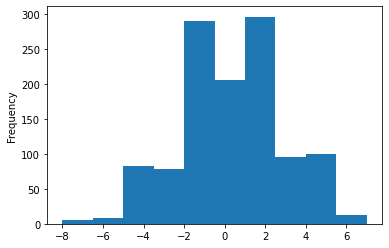

In [35]:
m1 = pd.to_numeric(scores[scores['minute'] == 7].score_by_minute)
m1.plot(kind='hist')

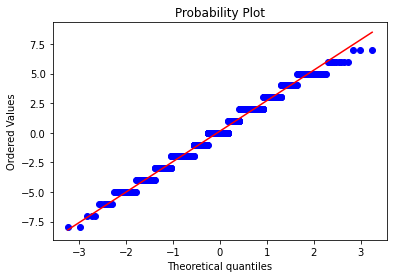

In [36]:
stats.probplot(m1, dist="norm", plot=pylab)
pylab.show()

In [9]:
scores['score_by_minute'].mean()


0.05776988587387512

In [10]:
scores['score_by_minute'].var()

6.757165987629284

In [184]:
n_params = {}
for minute in range(0, 48):
    score = scores[scores['minute'] == minute].score_by_minute
    print((score.mean(), score.std()))
    n_params[minute] = (score.mean(), score.std())

(0.0, 0.0)
(0.14012738853503184, 2.424905004836754)
(0.15911035072711718, 2.6645191351433692)
(-0.11815068493150685, 2.7434888572935354)
(0.14528462192013594, 2.663075227640244)
(0.10717299578059072, 2.6270727063930988)
(-0.11694915254237288, 2.7428465085422697)
(0.13798977853492334, 2.590830057846758)
(-0.008410428931875526, 2.613728952434338)
(0.06649616368286446, 2.656824122733863)
(0.03741496598639456, 2.6077386864087533)
(0.0919831223628692, 2.6804746074784087)
(0.06747967479674796, 2.69487039274235)
(-0.026833631484794274, 2.4978406056405245)
(0.14104729729729729, 2.6461418830152765)
(0.13570822731128074, 2.509453549447326)
(-0.04576271186440678, 2.593710801097148)
(0.03675213675213675, 2.656145070688678)
(0.12339331619537275, 2.6279000744758956)
(0.03559322033898305, 2.6182800142522717)
(0.061499578770008424, 2.5520732785682205)
(0.14443500424808836, 2.6243635524653124)
(0.18394648829431437, 2.667255617549933)
(0.1335559265442404, 2.638737048188864)
(0.08699186991869919, 2.73507

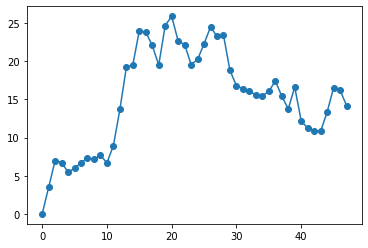

In [12]:
n_params = (scores['score_by_minute'].mean(), scores['score_by_minute'].std())

current = 0
W = [current]
for i in range(1, 48):
#     current = current + np.random.normal(n_params[i][0], n_params[i][1])
    current = current + np.random.normal(n_params[0], n_params[1])
    W.append(current)
plt.plot(range(0, 48), W, '-o')
plt.show()

In [13]:
def brownian_replication(mean, stdev, num_steps, score):
    current = score
    W = [current]
    for i in range(0, num_steps):
        current = current + np.random.normal(mean, stdev)
        W.append(current)
    return W


def evaluate_home_team_result(score_margin):
    if score_margin > 0:
        return 1
    else:
        return 0
    

def run_simulation(replications, mean, stdev, score, time_remaining):
    reps = [brownian_replication(mean, stdev, time_remaining, score) for x in range(replications)]
    wins = sum([evaluate_home_team_result(reps[i][-1]) for i in range(len(reps))])
    return wins / replications 



In [273]:
run_simulation(1000, n_params[0], n_params[1], -6,1)

0.01

In [236]:
replications = 1000
reps = [brownian_replication(n_params[0], n_params[1], 48)[-1] for x in range(replications)]

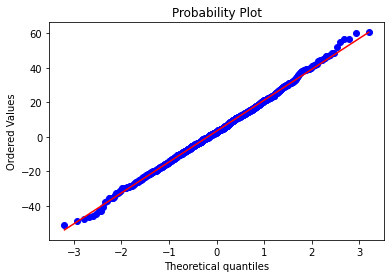

In [237]:
stats.probplot(reps, dist="norm", plot=pylab)
pylab.show()

In [15]:
data = np.array(reps)
plt.hist(data)

NameError: name 'reps' is not defined

In [14]:
from scipy.stats import norm


# Generate some data for this demonstration.

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

NameError: name 'data' is not defined

In [16]:
test_df = pd.read_csv('2017-18_pbp.csv')

In [17]:
# Winner is at 0:00, period=4
# Need to find random points in the game and get the winner
test_df = add_time_info(test_df)
test_df.head()

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,quarter_ts,ts,minute
0,0,0,12,2,21700627,NaN,NaN,12:00,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2:11 PM,0.000000,0.000000,0.0
1,1,0,10,4,21700627,Jump Ball Barnes vs. Lopez: Tip to Ball,NaN,12:00,1,4.0,...,Los Angeles,1.610613e+09,Lakers,NaN,NaN,NaN,2:11 PM,0.000000,0.000000,0.0
2,2,3,1,7,21700627,NaN,NaN,11:44,1,5.0,...,NaN,NaN,NaN,2 - 0,-2,Randle 10' Hook Shot (2 PTS) (Ingram 1 AST),2:11 PM,0.266667,0.266667,1.0
3,3,1,1,9,21700627,Barnes 25' 3PT Jump Shot (3 PTS) (Matthews 1 AST),NaN,11:29,1,4.0,...,NaN,NaN,NaN,2 - 3,1,NaN,2:11 PM,0.516667,0.516667,1.0
4,4,63,1,12,21700627,NaN,NaN,11:12,1,5.0,...,NaN,NaN,NaN,4 - 3,-1,Ingram 13' Fadeaway Jumper (2 PTS) (Ball 1 AST),2:12 PM,0.800000,0.800000,1.0


In [18]:
# df.loc[(df.PCTIMESTRING == '12:00') & (df.PERIOD == 1), 'game_result'] = 0
test_df = fix_score_margin(test_df)
test_df = test_df.astype({'SCOREMARGIN': float})

test_df['result'] = test_df.apply(lambda row: int(row['SCOREMARGIN'] > 0) if (row['PCTIMESTRING'] == "0:00" and row['PERIOD'] == 4) else 'undefined', axis=1)

test_df.sort_values(by=['GAME_ID', 'ts'], inplace=True)
test_df['result'] = test_df.groupby(['GAME_ID'])['result'].transform('last')

test_df[test_df['GAME_ID'] == 21700001]

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,quarter_ts,ts,minute,result
23754,0,0,12,2,21700001,NaN,NaN,12:00,1,0.0,...,NaN,NaN,NaN,0.0,NaN,8:04 PM,0.000000,0.000000,0.0,1
23755,1,0,10,4,21700001,Jump Ball Love vs. Horford: Tip to Irving,NaN,12:00,1,4.0,...,1.610613e+09,Celtics,NaN,0.0,NaN,8:04 PM,0.000000,0.000000,0.0,1
23756,2,101,1,7,21700001,NaN,NaN,11:44,1,5.0,...,NaN,NaN,2 - 0,-2.0,Irving 10' Driving Floating Jump Shot (2 PTS) ...,8:04 PM,0.266667,0.266667,1.0,1
23765,11,1,1,20,21700001,NaN,NaN,10:48,1,5.0,...,NaN,NaN,4 - 0,-4.0,Horford 20' Jump Shot (2 PTS) (Irving 1 AST),8:05 PM,1.200000,1.200000,2.0,1
23767,13,16,3,23,21700001,Love Free Throw Technical (1 PTS),NaN,10:32,1,4.0,...,NaN,NaN,4 - 1,-3.0,NaN,8:06 PM,1.466667,1.466667,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24210,456,12,3,650,21700001,Love Free Throw 2 of 2 (12 PTS),NaN,1:43,4,4.0,...,NaN,NaN,98 - 97,-1.0,NaN,10:26 PM,10.283333,46.283333,47.0,1
24213,459,5,1,653,21700001,James 2' Layup (29 PTS),NaN,1:19,4,4.0,...,NaN,NaN,98 - 99,1.0,NaN,10:26 PM,10.683333,46.683333,47.0,1
24216,462,1,1,656,21700001,Love 3PT Jump Shot (15 PTS) (James 9 AST),NaN,0:46,4,4.0,...,NaN,NaN,98 - 102,4.0,NaN,10:29 PM,11.233333,47.233333,48.0,1
24221,467,10,3,665,21700001,NaN,NaN,0:46,4,5.0,...,NaN,NaN,99 - 102,3.0,Irving Free Throw 1 of 1 (22 PTS),10:31 PM,11.233333,47.233333,48.0,1


In [19]:
testing_set = test_df[test_df['ts'] < 48 ].groupby('GAME_ID').apply(lambda x: x.sample(1)).reset_index(drop=True)
testing_set.head(5)

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,quarter_ts,ts,minute,result
0,419,72,1,599,21700001,Shumpert 1' Putback Layup (4 PTS),NaN,5:46,4,4.0,...,NaN,NaN,87 - 86,-1.0,NaN,10:16 PM,6.233333,42.233333,43.0,1
1,310,108,1,466,21700002,Bell 1' Cutting Dunk Shot (6 PTS) (Durant 6 AST),NaN,3:15,3,4.0,...,NaN,NaN,82 - 97,15.0,NaN,12:44 AM,8.750000,32.750000,33.0,0
2,92,1,1,132,21700003,NaN,NaN,1:38,1,5.0,...,NaN,NaN,25 - 25,0.0,Stone 3PT Jump Shot (3 PTS) (Monk 1 AST),7:38 PM,10.366667,10.366667,11.0,1
3,300,5,1,425,21700004,Bogdanovic 1' Layup (11 PTS) (Young 2 AST),NaN,7:04,3,4.0,...,NaN,NaN,73 - 79,6.0,NaN,8:38 PM,4.933333,28.933333,29.0,1
4,250,12,3,358,21700005,Vucevic Free Throw 2 of 2 (13 PTS),NaN,11:14,3,4.0,...,NaN,NaN,55 - 62,7.0,NaN,8:32 PM,0.766667,24.766667,25.0,1


In [40]:
testing_set = test_df[test_df['ts'] < 48 ].groupby('GAME_ID').apply(lambda x: x.sample(1)).reset_index(drop=True)

testing_set['proba'] = testing_set.apply(lambda row: run_simulation(1000, n_params[0], n_params[1], row['SCOREMARGIN'], int(row['minute'])), axis=1)
testing_set['prediction'] = testing_set.apply(lambda row: int(row['proba']) > 0.5, axis=1)
testing_set = testing_set[testing_set['result'] != 'undefined']
testing_set = testing_set.astype({'result': int})

In [306]:
testing_set['correct'] = testing_set.apply(lambda row: row['result'] == row['prediction'], axis=1)


In [316]:
len(testing_set[(testing_set['correct'] == 1) & (testing_set['minute'] >= 36)])

272

In [318]:
len(testing_set[testing_set['minute'] >= 36])

327

In [310]:
859/1230

0.6983739837398374

In [27]:
testing_set.head(5)

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,quarter_ts,ts,minute,result,proba,prediction
0,419,72,1,599,21700001,Shumpert 1' Putback Layup (4 PTS),NaN,5:46,4,4.0,...,87 - 86,-1.0,NaN,10:16 PM,6.233333,42.233333,43.0,1,0.524,False
1,310,108,1,466,21700002,Bell 1' Cutting Dunk Shot (6 PTS) (Durant 6 AST),NaN,3:15,3,4.0,...,82 - 97,15.0,NaN,12:44 AM,8.750000,32.750000,33.0,0,0.867,False
2,92,1,1,132,21700003,NaN,NaN,1:38,1,5.0,...,25 - 25,0.0,Stone 3PT Jump Shot (3 PTS) (Monk 1 AST),7:38 PM,10.366667,10.366667,11.0,1,0.509,False
3,300,5,1,425,21700004,Bogdanovic 1' Layup (11 PTS) (Young 2 AST),NaN,7:04,3,4.0,...,73 - 79,6.0,NaN,8:38 PM,4.933333,28.933333,29.0,1,0.725,False
4,250,12,3,358,21700005,Vucevic Free Throw 2 of 2 (13 PTS),NaN,11:14,3,4.0,...,55 - 62,7.0,NaN,8:32 PM,0.766667,24.766667,25.0,1,0.749,False


In [31]:
t = testing_set[testing_set['result'] != 'undefined']
t = t.astype({'result': int})


In [41]:
from sklearn.calibration import calibration_curve

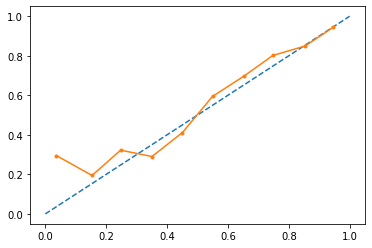

In [43]:
fop, mpv = calibration_curve(testing_set['result'], testing_set['proba'], n_bins=10)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(mpv, fop, marker='.')
plt.show()

In [37]:
# Create calibration curves for each quarter
# Graph the win probability by points for each quarter

In [88]:
testing_set.sort_values(by=['PERIOD', 'proba'], inplace=True)

fop1, mpv1 = calibration_curve(testing_set[testing_set['PERIOD'] == 1]['result'], testing_set[testing_set['PERIOD'] == 1]['proba'], n_bins=10)
fop2, mpv2 = calibration_curve(testing_set[testing_set['PERIOD'] == 2]['result'], testing_set[testing_set['PERIOD'] == 2]['proba'], n_bins=10)
fop3, mpv3 = calibration_curve(testing_set[testing_set['PERIOD'] == 3]['result'], testing_set[testing_set['PERIOD'] == 3]['proba'], n_bins=10)
fop4, mpv4 = calibration_curve(testing_set[testing_set['PERIOD'] == 4]['result'], testing_set[testing_set['PERIOD'] == 4]['proba'], n_bins=10)


Text(0.5, 1.0, '4th Quarter')

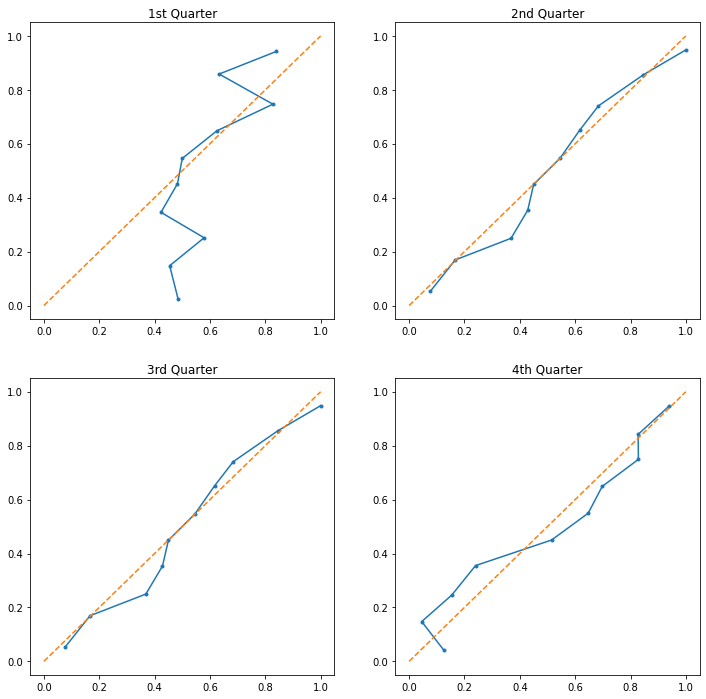

In [106]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs[0, 0].plot(fop1, mpv1, marker='.')
axs[0, 0].plot([0,1],[0,1],linestyle='--')
axs[0, 0].set_title('1st Quarter')

axs[0, 1].plot(fop2, mpv2, marker='.')
axs[0, 1].plot([0,1],[0,1],linestyle='--')
axs[0, 1].set_title('2nd Quarter')

axs[1, 0].plot(fop2, mpv2, marker='.')
axs[1, 0].plot([0,1],[0,1], linestyle='--')
axs[1, 0].set_title('3rd Quarter')

axs[1, 1].plot(fop3, mpv3, marker='.')
axs[1, 1].plot([0,1],[0,1], linestyle='--')
axs[1, 1].set_title('4th Quarter')

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

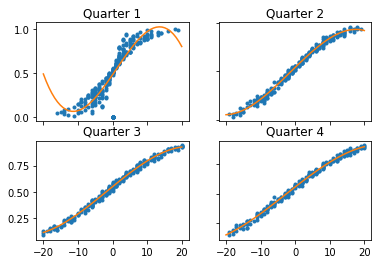

In [98]:
data = testing_set[testing_set['SCOREMARGIN'].between(-20, 20)]
# x = data['SCOREMARGIN']
# y = data['proba']


# # p = np.poly1d(np.polyfit(x, y, 3))
# # t = np.linspace(-20, 20)
# # plt.plot(t, p(t), '-')
# # plt.show()


figs, axs = plt.subplots(2, 2)
plot_map = {1: axs[0, 0], 2: axs[0, 1], 3: axs[1, 0], 4: axs[1, 1]}
for i in plot_map.keys():
    df = data[data['PERIOD'] == i]
    x = df['SCOREMARGIN']
    y = df['proba']
    
    p = np.poly1d(np.polyfit(x, y, 3))
    t = np.linspace(-20, 20)
    
    plot_map[i].plot(x, y, '.')
    plot_map[i].plot(t, p(t), '-')
    plot_map[i].set_title(f"Quarter {i}")
    
for ax in axs.flat:
    ax.label_outer()

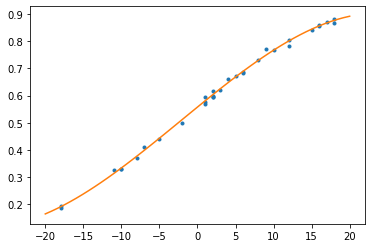

In [103]:
d = data[data['minute'] == 45.0]
x = d['SCOREMARGIN']
y = d['proba']

p = np.poly1d(np.polyfit(x, y, 3))
t = np.linspace(-20, 20)

plt.plot(x, y, '.')
plt.plot(t, p(t), '-')